In [ ]:
from google.colab import files
files.upload()

Saving test_video.mp4 to test_video.mp4


In [ ]:
!ls -al

total 32700
drwxr-xr-x 1 root root     4096 Mar 12 10:58 .
drwxr-xr-x 1 root root     4096 Mar 12 10:57 ..
drwxr-xr-x 4 root root     4096 Mar  5 14:36 .config
drwxr-xr-x 1 root root     4096 Mar  5 14:37 sample_data
-rw-r--r-- 1 root root 33466715 Mar 12 11:05 test_video.mp4


In [ ]:
import cv2
import numpy as np
import IPython
from google.colab.patches import cv2_imshow

In [ ]:
file_name = 'test_video.mp4'

In [ ]:
def detectAndDisplay(frame):
    IPython.display.clear_output(wait=True)
    # Conver the image to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
    height, width = gray.shape
    # GaussianBlur for refucing noise
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    # Canny Edge detection
    canny = cv2.Canny(blur, 40, 130)
    mask = np.zeros((height,width), dtype='uint8')
    poly_heigh = int(0.60 * height)
    poly_left = int(0.47 * width)
    poly_right = int(0.53 * width)
    polygons = np.array([[(0,height), (poly_left, poly_heigh), (poly_right, poly_heigh), (width, height)]])
    cv2.fillPoly(mask, polygons, 255)
    # Bitwise operation between poly and mask
    masked = cv2.bitwise_and(canny, mask)
    lines = cv2.HoughLinesP(masked, 2, np.pi / 180, 20, np.array([]), 20, 10)
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(frame, (x1, y1), (x2, y2), (0, 255, 0), 5)
    cv2_imshow(frame)

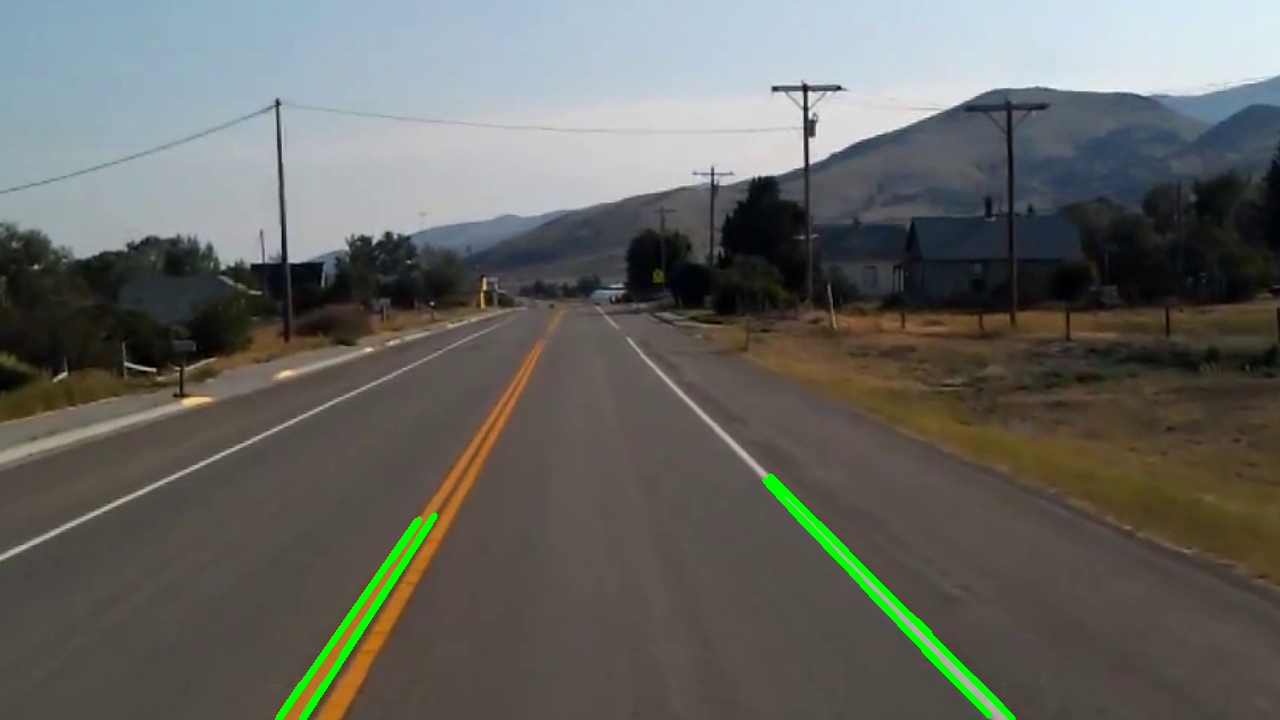

--(!) No captured frame -- Break!


In [ ]:
#-- 2. Read the video stream
cap = cv2.VideoCapture(file_name)

if not cap.isOpened:
    print('--(!)Error opening video capture')
    exit(0)

while True:
    ret, frame = cap.read()
    if frame is None:
        print('--(!) No captured frame -- Break!')
        break   
    detectAndDisplay(frame)        